# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

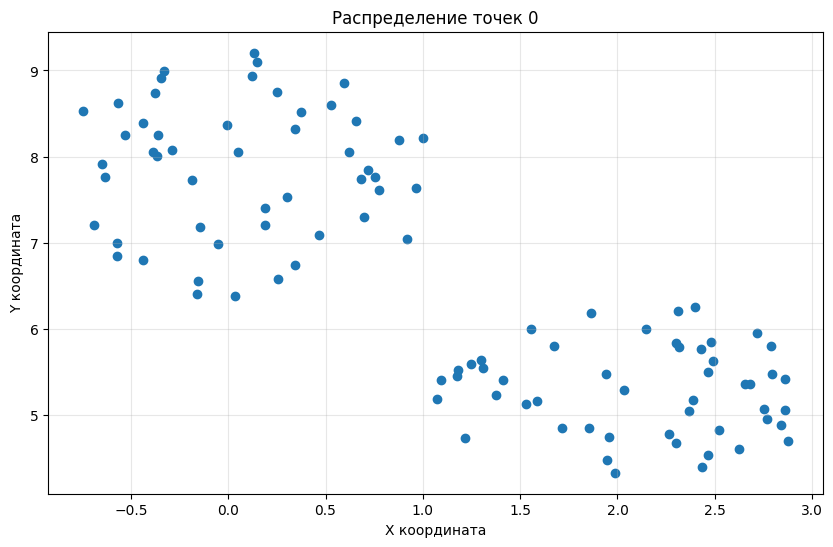

Центры кластеров [array([0.04811155, 8.05305091]), array([2.033901 , 5.2892959])]
расстояние до центров кластеров [np.float64(43.29877255955909), np.float64(36.15344028339771)]
Точка усреднение всех центров [1041.00627785 6671.17340665]


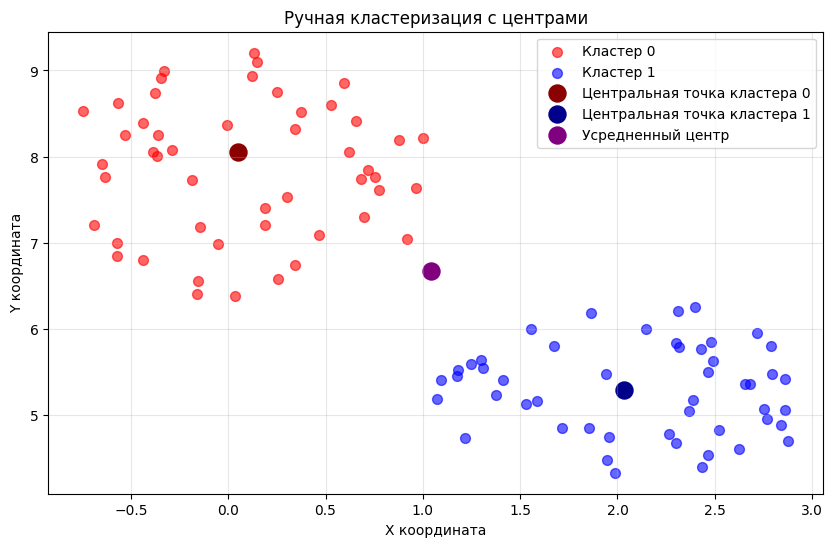

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE/0.xls")
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Распределение точек 0')
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.grid(True, alpha=0.3)
plt.show()
n = len(df)
clast = np.zeros(len(df))
for i in range(n):
    if (df['X'][i] <= 1 or df['Y'][i] > 7):
        clast[i] = 0
    else:
        clast[i] = 1
colors = ['red','blue']



data = df.iloc[:,:2].values
n_clusters = 2
def find_central_points_euclidean(data, labels, n_clusters):
    central_points = []
    min_distances = []
    for cluster_id in range(n_clusters):
        cluster_data = data[(labels == cluster_id)]
        dist_matrix = cdist(cluster_data, cluster_data, metric='euclidean')
        sum_distances = dist_matrix.sum(axis=1)
        min_idx = np.argmin(sum_distances)
        central_point = cluster_data[min_idx]
        central_points.append(central_point)
        min_distances.append(sum_distances[min_idx])
    return central_points,min_distances
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
print("Центры кластеров",central_points)
print("расстояние до центров кластеров",min_distances)

plt.figure(figsize=(10,6))
for i in range(2):
    cluster_points = df[clast == i]
    plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[i], alpha=0.6, s=50,label=f'Кластер {i}')
colors2 = ["darkred","darkblue"]
for i, (point, dist) in enumerate(zip(central_points, min_distances)):
    plt.scatter(point[0], point[1], 
                color=colors2[i], s=150,
                label=f'Центральная точка кластера {i}')
    

super_central = np.mean(central_points,axis=0)
plt.scatter(super_central[0],super_central[1],color='purple',s=150,label=f'Усредненный центр')
super_central *= 1000
print("Точка усреднение всех центров",super_central)
plt.title('Ручная кластеризация c центрами')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

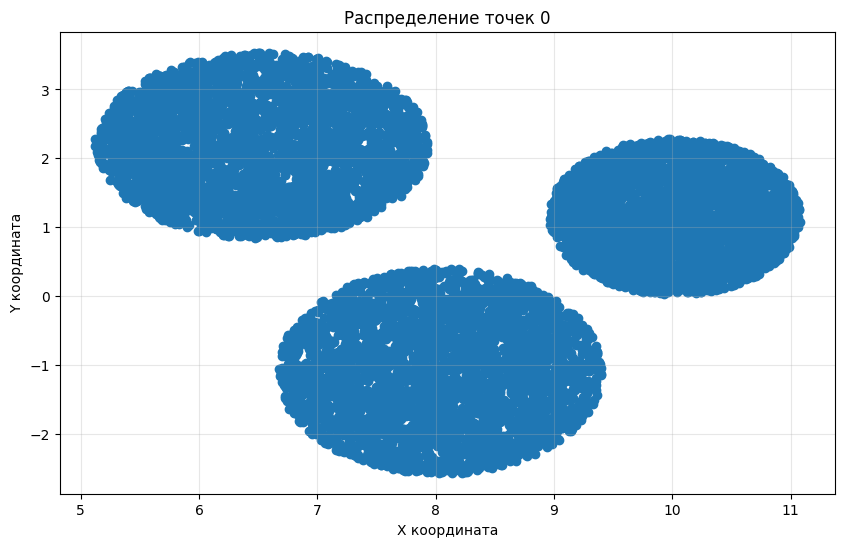

Центры кластеров [array([6.46998257, 2.169761  ]), array([ 8.04007453, -1.10870557]), array([10.02253531,  1.1542006 ])]
расстояние до центров кластеров [np.float64(3086.316800188415), np.float64(3177.1590666142242), np.float64(2456.775751368843)]
Точка усреднение всех центров [8177.53080516  738.41867566]


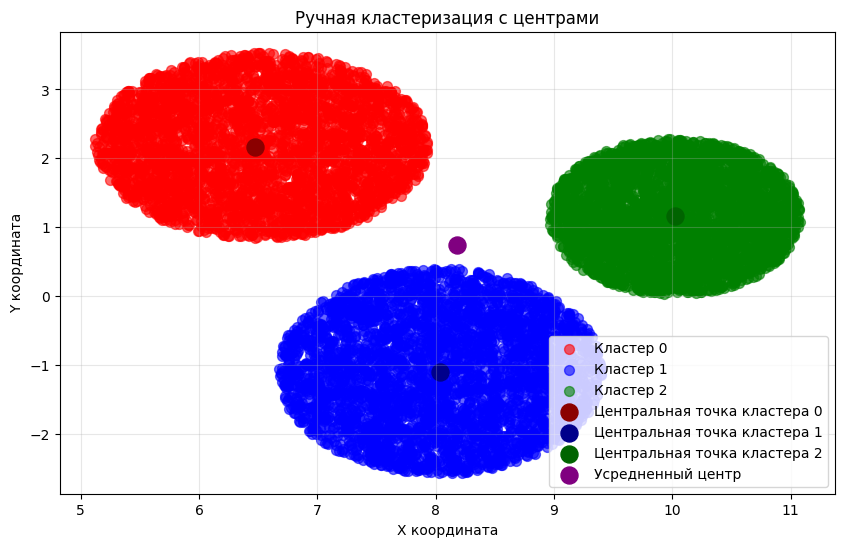

In [228]:
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE/1.xls")
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Распределение точек 0')
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.grid(True, alpha=0.3)
plt.show()
clast = np.zeros(len(df))
data = df.iloc[:,:2].values
n = len(df)
centre = [[6.5,2.4],[8,-1],[10,1.2]]
for i in range(n):
    distances = cdist([data[i]], centre, metric='euclidean')[0]
    min_id = np.argmin(distances)
    clast[i] = min_id
colors = ['red','blue','green']


n_clusters = 3
def find_central_points_euclidean(data, labels, n_clusters):
    central_points = []
    min_distances = []
    for cluster_id in range(n_clusters):
        cluster_data = data[(labels == cluster_id)]
        dist_matrix = cdist(cluster_data, cluster_data, metric='euclidean')
        sum_distances = dist_matrix.sum(axis=1)
        min_idx = np.argmin(sum_distances)
        central_point = cluster_data[min_idx]
        central_points.append(central_point)
        min_distances.append(sum_distances[min_idx])
    return central_points,min_distances
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
print("Центры кластеров",central_points)
print("расстояние до центров кластеров",min_distances)

plt.figure(figsize=(10,6))
for i in range(n_clusters):
    cluster_points = df[clast == i]
    plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[i], alpha=0.6, s=50,label=f'Кластер {i}')
colors2 = ["darkred","darkblue","darkgreen"]
for i, (point, dist) in enumerate(zip(central_points, min_distances)):
    plt.scatter(point[0], point[1], 
                color=colors2[i], s=150,
                label=f'Центральная точка кластера {i}')
    

super_central = np.mean(central_points,axis=0)
plt.scatter(super_central[0],super_central[1],color='purple',s=150,label=f'Усредненный центр')
super_central *= 1000
print("Точка усреднение всех центров",super_central)
plt.title('Ручная кластеризация c центрами')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


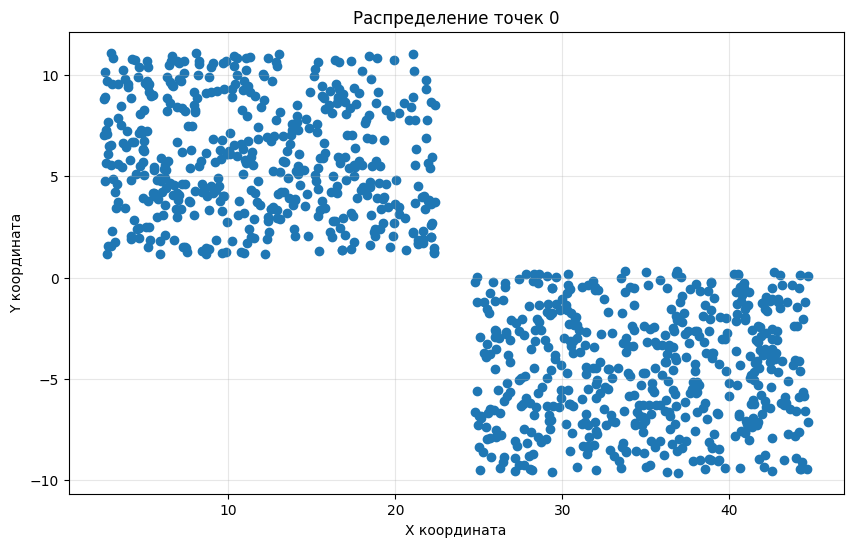

Центры кластеров [array([11.3340802 ,  5.96596108]), array([34.92635132, -4.69527649])]
расстояние до центров кластеров [np.float64(2811.468599661842), np.float64(3092.4875279608495)]
Точка усреднение всех центров [23130.21575949   635.34229437]


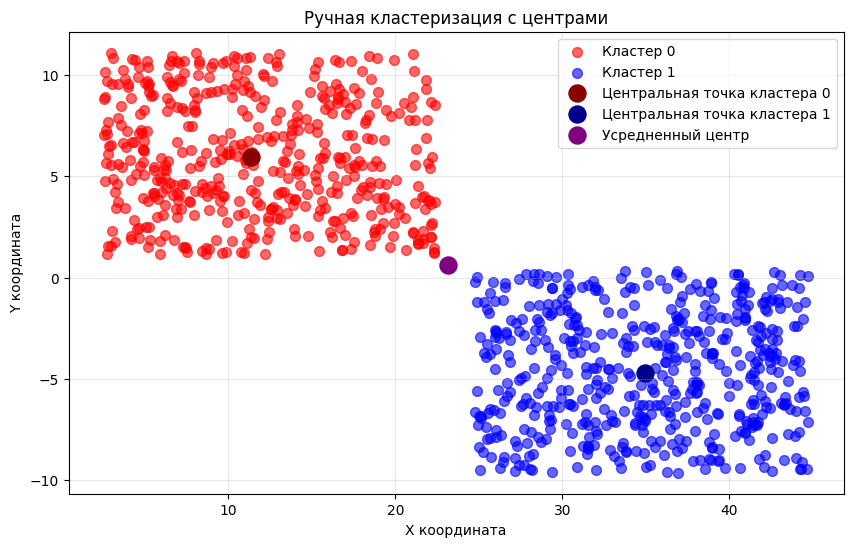

In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE/2.xlsx")
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Распределение точек 0')
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.grid(True, alpha=0.3)
plt.show()
n = len(df)
clast = np.zeros(len(df))
data = df.iloc[:,:2].values
for i in range(n):
    if (data[i][0] <= 23):
        clast[i] = 0
    else:
        clast[i] = 1
colors = ['red','blue']



n_clusters = 2
def find_central_points_euclidean(data, labels, n_clusters):
    central_points = []
    min_distances = []
    for cluster_id in range(n_clusters):
        cluster_data = data[(labels == cluster_id)]
        dist_matrix = cdist(cluster_data, cluster_data, metric='euclidean')
        sum_distances = dist_matrix.sum(axis=1)
        min_idx = np.argmin(sum_distances)
        central_point = cluster_data[min_idx]
        central_points.append(central_point)
        min_distances.append(sum_distances[min_idx])
    return central_points,min_distances
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
print("Центры кластеров",central_points)
print("расстояние до центров кластеров",min_distances)

plt.figure(figsize=(10,6))
for i in range(2):
    cluster_points = df[clast == i]
    plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[i], alpha=0.6, s=50,label=f'Кластер {i}')
colors2 = ["darkred","darkblue"]
for i, (point, dist) in enumerate(zip(central_points, min_distances)):
    plt.scatter(point[0], point[1], 
                color=colors2[i], s=150,
                label=f'Центральная точка кластера {i}')
    

super_central = np.mean(central_points,axis=0)
plt.scatter(super_central[0],super_central[1],color='purple',s=150,label=f'Усредненный центр')
super_central *= 1000
print("Точка усреднение всех центров",super_central)
plt.title('Ручная кластеризация c центрами')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

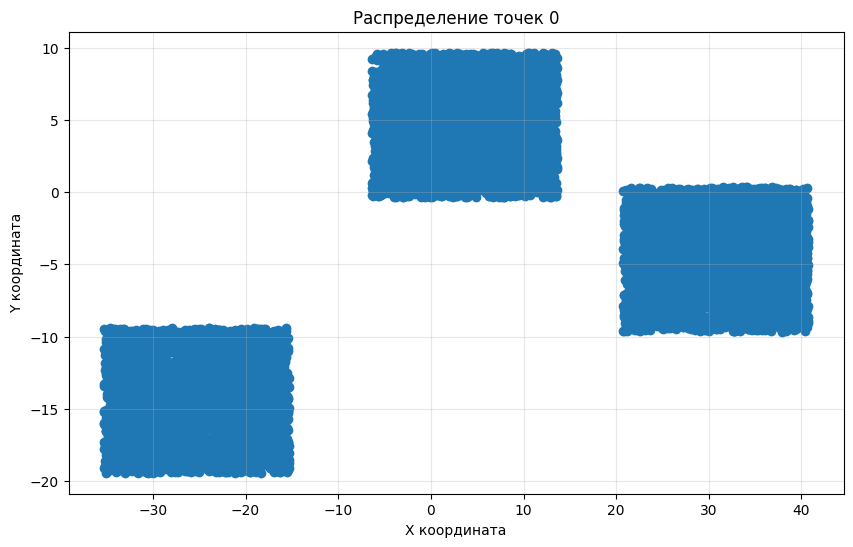

Центры кластеров [array([-25.1307584 , -14.41332836]), array([3.51791128, 4.65369556]), array([30.84952916, -4.51720291])]
расстояние до центров кластеров [np.float64(25620.922374554215), np.float64(24396.131988100948), np.float64(24365.73551645194)]
Точка усреднение всех центров [ 3078.89401444 -4758.94523844]


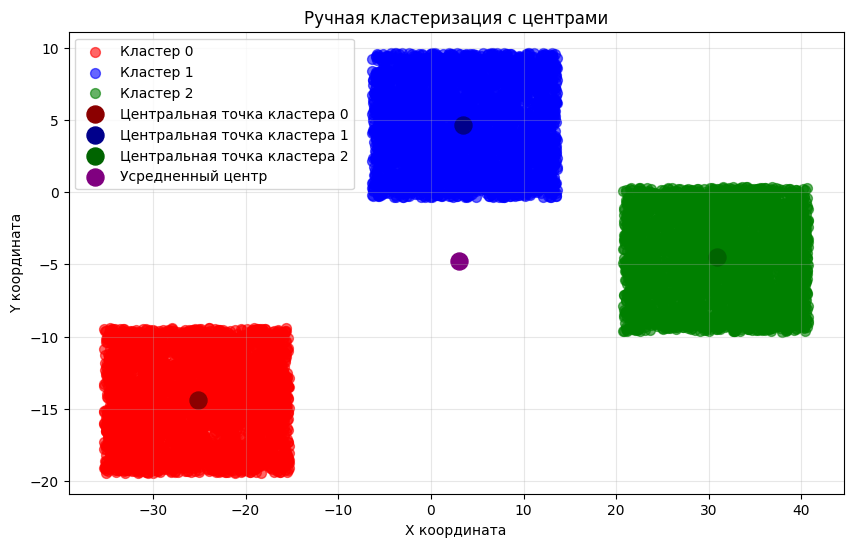

In [230]:
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE/3.xlsx")
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Распределение точек 0')
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.grid(True, alpha=0.3)
plt.show()
clast = np.zeros(len(df))
data = df.iloc[:,:2].values
n = len(df)
centre = [[-25,-15],[5,5],[30,-5]]

#Делаю манхетонское расстояние

for i in range(n):
    distances = cdist([data[i]], centre, metric='cityblock')[0]
    min_id = np.argmin(distances)
    clast[i] = min_id
colors = ['red','blue','green']


n_clusters = 3
def find_central_points_euclidean(data, labels, n_clusters):
    central_points = []
    min_distances = []
    for cluster_id in range(n_clusters):
        cluster_data = data[(labels == cluster_id)]
        dist_matrix = cdist(cluster_data, cluster_data, metric='cityblock')
        sum_distances = dist_matrix.sum(axis=1)
        min_idx = np.argmin(sum_distances)
        central_point = cluster_data[min_idx]
        central_points.append(central_point)
        min_distances.append(sum_distances[min_idx])
    return central_points,min_distances
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
print("Центры кластеров",central_points)
print("расстояние до центров кластеров",min_distances)

plt.figure(figsize=(10,6))
for i in range(n_clusters):
    cluster_points = df[clast == i]
    plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[i], alpha=0.6, s=50,label=f'Кластер {i}')
colors2 = ["darkred","darkblue","darkgreen"]
for i, (point, dist) in enumerate(zip(central_points, min_distances)):
    plt.scatter(point[0], point[1], 
                color=colors2[i], s=150,
                label=f'Центральная точка кластера {i}')
    

super_central = np.mean(central_points,axis=0)
plt.scatter(super_central[0],super_central[1],color='purple',s=150,label=f'Усредненный центр')
super_central *= 1000
print("Точка усреднение всех центров",super_central)
plt.title('Ручная кластеризация c центрами')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


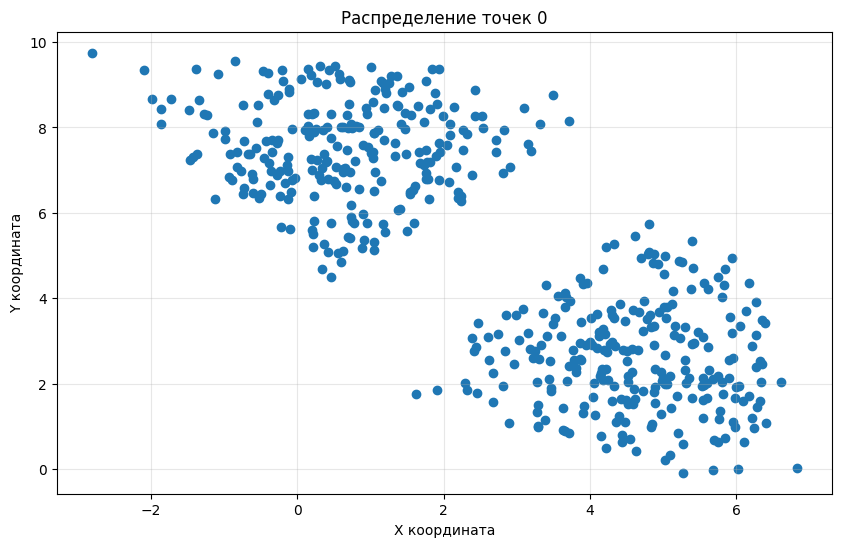

Центры кластеров [array([0.67779061, 7.46832145]), array([4.49928923, 2.52481355])]
расстояние до центров кластеров [np.float64(460.4682788070491), np.float64(470.32855350048715)]
Точка усреднение всех центров [2588.53992189 4996.56750345]


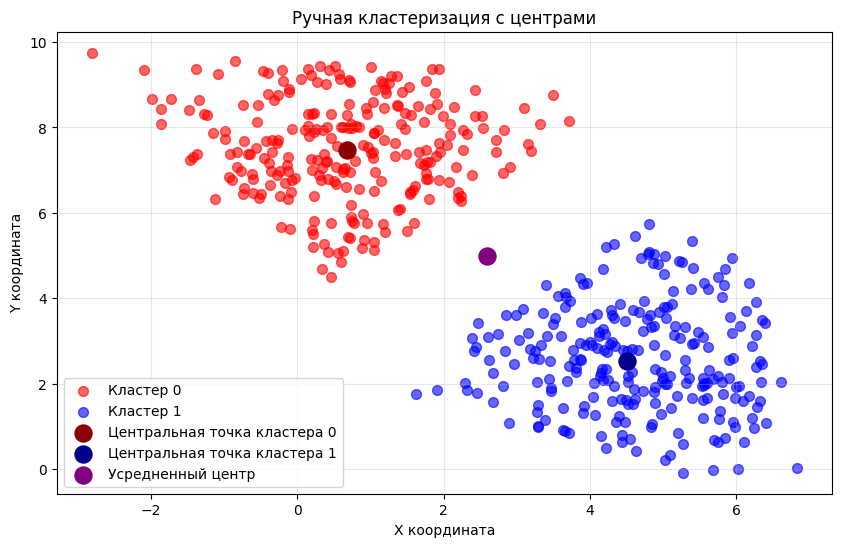

In [231]:
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE/4.xlsx")
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Распределение точек 0')
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.grid(True, alpha=0.3)
plt.show()
clast = np.zeros(len(df))
data = df.iloc[:,:2].values
n = len(df)
line_k = 1
line_b = 2
#Делаю манхетонское расстояние

for i in range(n):
    if (line_k * data[i][0] + line_b < data[i][1]):
        clast[i] = 0
    else:
        clast[i] = 1
colors = ['red','blue']


n_clusters = 2
def find_central_points_euclidean(data, labels, n_clusters):
    central_points = []
    min_distances = []
    for cluster_id in range(n_clusters):
        cluster_data = data[(labels == cluster_id)]
        dist_matrix = cdist(cluster_data, cluster_data, metric='cityblock')
        sum_distances = dist_matrix.sum(axis=1)
        min_idx = np.argmin(sum_distances)
        central_point = cluster_data[min_idx]
        central_points.append(central_point)
        min_distances.append(sum_distances[min_idx])
    return central_points,min_distances
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
print("Центры кластеров",central_points)
print("расстояние до центров кластеров",min_distances)

plt.figure(figsize=(10,6))
for i in range(n_clusters):
    cluster_points = df[clast == i]
    plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[i], alpha=0.6, s=50,label=f'Кластер {i}')
colors2 = ["darkred","darkblue"]
for i, (point, dist) in enumerate(zip(central_points, min_distances)):
    plt.scatter(point[0], point[1], 
                color=colors2[i], s=150,
                label=f'Центральная точка кластера {i}')
    

super_central = np.mean(central_points,axis=0)
plt.scatter(super_central[0],super_central[1],color='purple',s=150,label=f'Усредненный центр')
super_central *= 1000
print("Точка усреднение всех центров",super_central)
plt.title('Ручная кластеризация c центрами')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


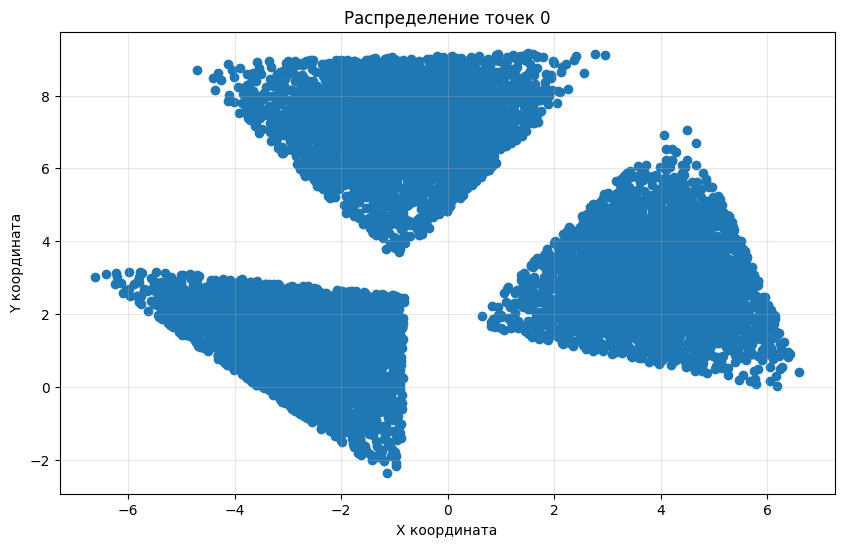

Центры кластеров [array([-2.74967383,  1.14305932]), array([3.85858481, 2.90716697]), array([-0.92395442,  7.11986015])]
расстояние до центров кластеров [np.float64(4503.347988185507), np.float64(4958.924247086197), np.float64(4975.829741832897)]
Точка усреднение всех центров [  61.65218875 3723.36214644]


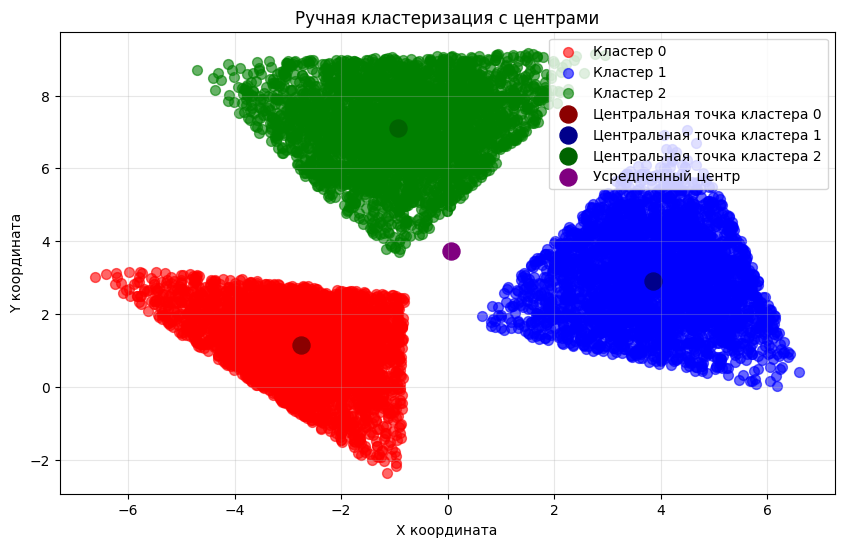

In [232]:
df = pd.read_excel("/Users/maksimdundin/Downloads/EGE/5.xlsx")
plt.figure(figsize=(10, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.title('Распределение точек 0')
plt.xlabel("X координата")
plt.ylabel("Y координата")
plt.grid(True, alpha=0.3)
plt.show()
clast = np.zeros(len(df))
data = df.iloc[:,:2].values
n = len(df)
line_k1 = -1
line_b1 = 2
line_k2 = 1
line_b2 = 4
#Делаю манхетонское расстояние

for i in range(n):
    if (line_k1 * data[i][0] + line_b1 > data[i][1]):
        clast[i] = 0
    elif (line_k2 * data[i][0] + line_b2 > data[i][1]):
        clast[i] = 1
    else:
        clast[i] = 2
colors = ['red','blue','green']


n_clusters = 3
def find_central_points_euclidean(data, labels, n_clusters):
    central_points = []
    min_distances = []
    for cluster_id in range(n_clusters):
        cluster_data = data[(labels == cluster_id)]
        dist_matrix = cdist(cluster_data, cluster_data, metric='euclidean')
        sum_distances = dist_matrix.sum(axis=1)
        min_idx = np.argmin(sum_distances)
        central_point = cluster_data[min_idx]
        central_points.append(central_point)
        min_distances.append(sum_distances[min_idx])
    return central_points,min_distances
central_points, min_distances = find_central_points_euclidean(data, clast, n_clusters)
print("Центры кластеров",central_points)
print("расстояние до центров кластеров",min_distances)

plt.figure(figsize=(10,6))
for i in range(n_clusters):
    cluster_points = df[clast == i]
    plt.scatter(cluster_points.iloc[:,0],cluster_points.iloc[:,1],color=colors[i], alpha=0.6, s=50,label=f'Кластер {i}')
colors2 = ["darkred","darkblue",'darkgreen']
for i, (point, dist) in enumerate(zip(central_points, min_distances)):
    plt.scatter(point[0], point[1], 
                color=colors2[i], s=150,
                label=f'Центральная точка кластера {i}')
    

super_central = np.mean(central_points,axis=0)
plt.scatter(super_central[0],super_central[1],color='purple',s=150,label=f'Усредненный центр')
super_central *= 1000
print("Точка усреднение всех центров",super_central)
plt.title('Ручная кластеризация c центрами')
plt.xlabel('X координата')
plt.ylabel('Y координата')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [233]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

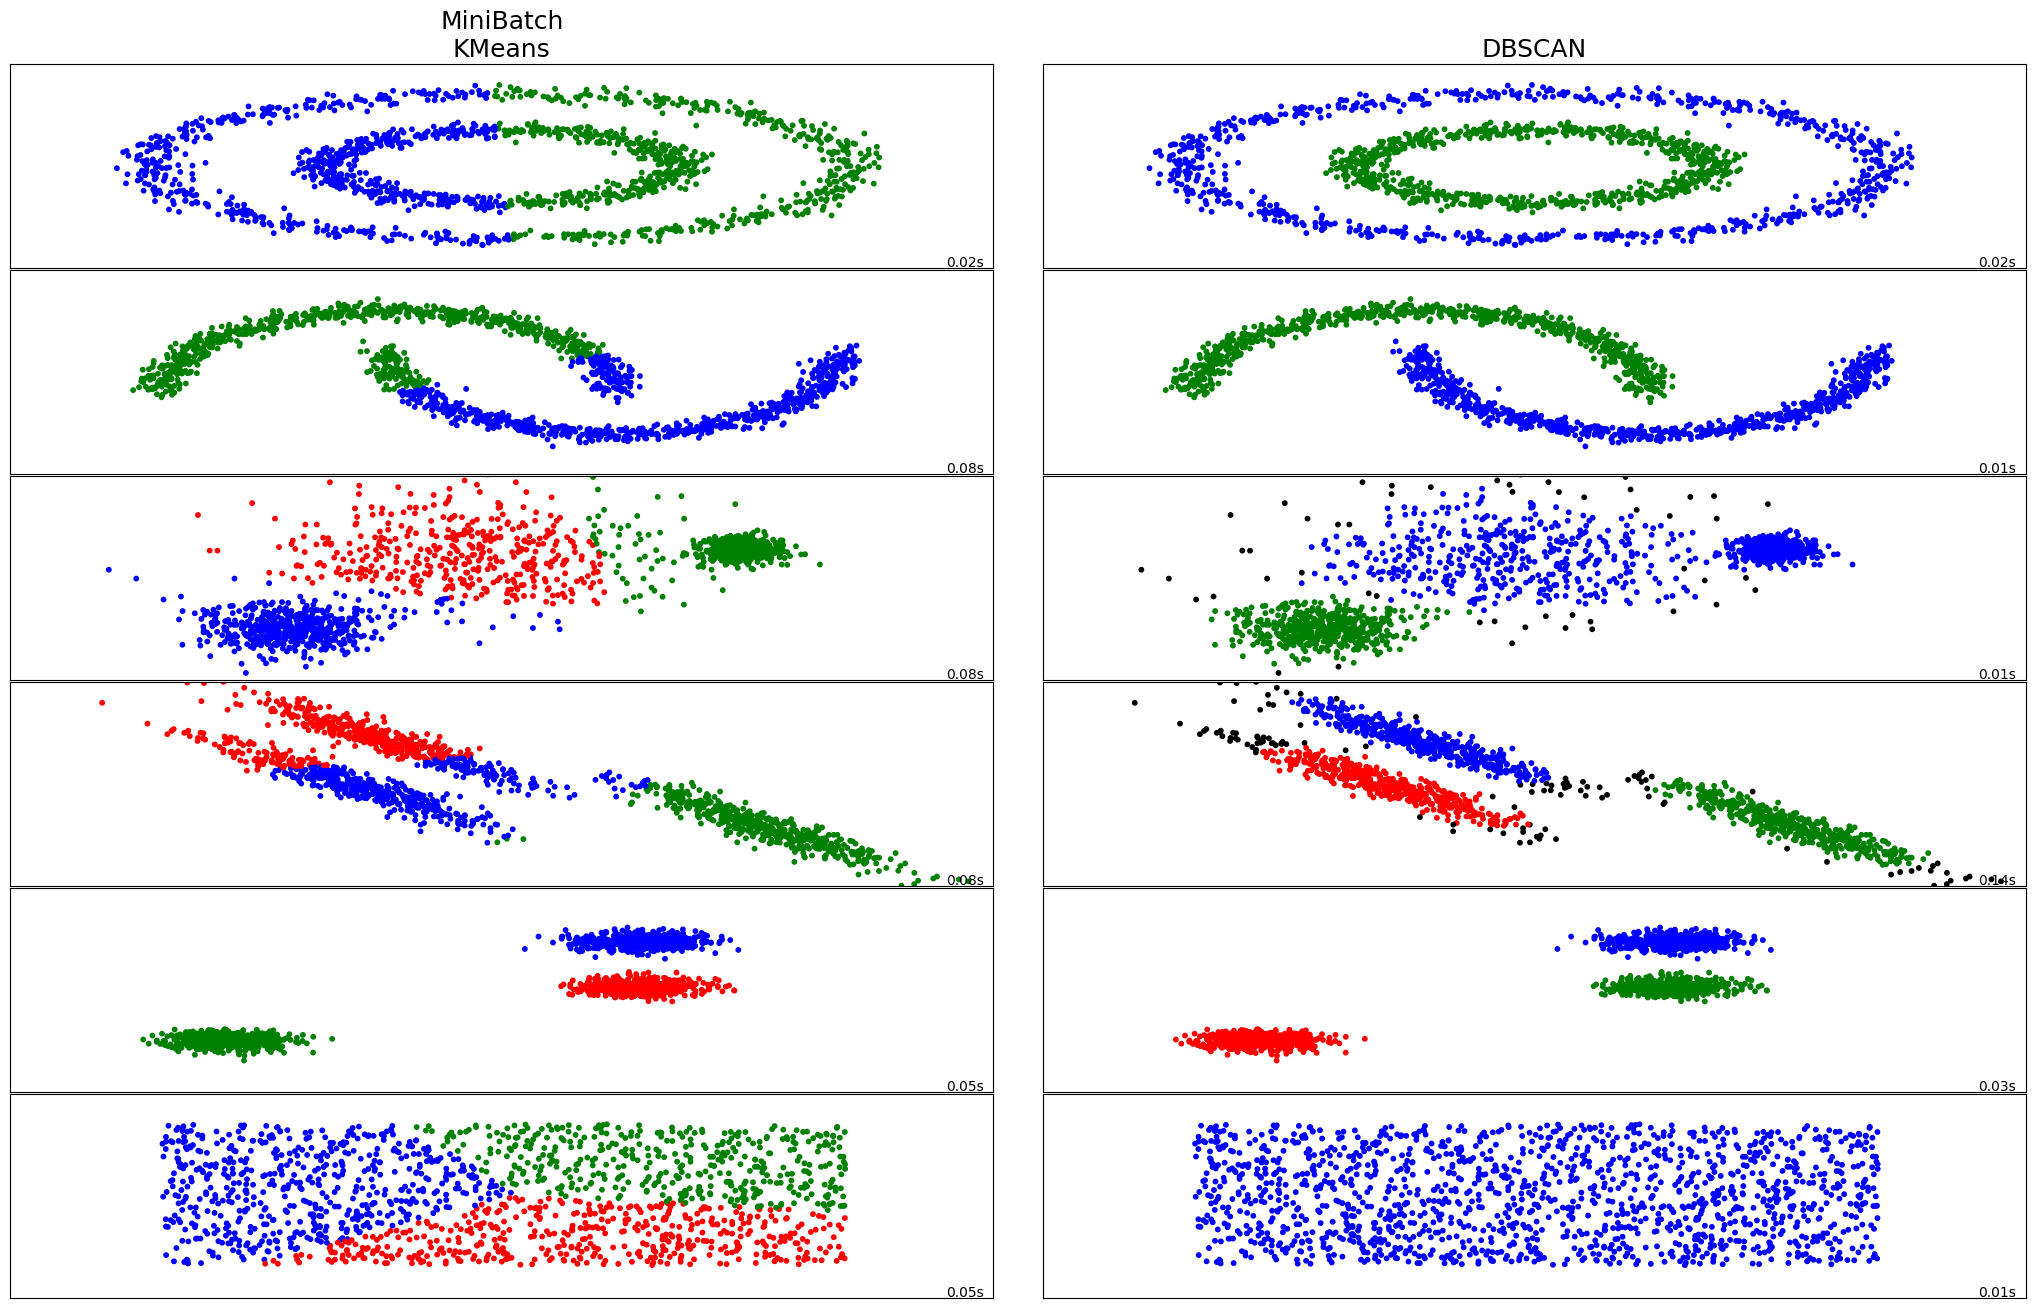

In [234]:
np.random.seed(0)
n_clusters = 3

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)

plot_num = 1

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)
    X, y = dataset
    two_means = cluster.MiniBatchKMeans(n_clusters=params["n_clusters"],batch_size=100,n_init=10,random_state=33)
    dbscan = cluster.DBSCAN(eps=params["eps"],min_samples=params["min_samples"])
    clustering_algorithms = (
        ("MiniBatch\nKMeans", two_means),
        ("DBSCAN", dbscan),
    )
    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params["quantile"])


    connectivity = kneighbors_graph(
        X, n_neighbors=params["n_neighbors"], include_self=False
    )
    connectivity = 0.5 * (connectivity + connectivity.T)

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)
        
        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        
        colors = np.array(list(islice(cycle([
            'blue', 'green', 'red'
        ]), int(max(y_pred) + 1))))
        
        colors = np.append(colors, ["#000000"])
        
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

        plt.text(0.99, 0.01, f'{(t1-t0):.2f}s',
                transform=plt.gca().transAxes,
                horizontalalignment='right')
        
        if i_dataset == 0:
            plt.title(name, size=18)
        
        plot_num += 1
plt.show()